# Assignment 3 - Clustering town councils

The **objective of the assignment** is to find the best way to cluster the town councils, based on the budgets.


## Data Reading and Preparation
Before investigating the data, we need to read the file and get only the rows we need.

We first read the data, and then we keep only the Town Council data:

In [3]:
import pandas as pd
import numpy as np

def get_column_match_string(data, column, string):
    return data[data[column].str.contains(string)]

town_council_data = pd.read_csv("budgets/Pressupostos_dels_ens_municipals_de_Catalunya.csv")
town_council_data = get_column_match_string(town_council_data, "NOM_COMPLERT", "Ajuntament")

town_council_data

,ANY_EXERCICI,TIPUS_PARTIDA,TIPUS_CLASSIF,CODI_PANTALLA,NIVELL,DESCRIPCIO,IMPORT,ID_ESTRUCTURA,ESTRUCTURA,CODI_ENS,NOM_COMPLERT
245,01/01/2016 12:00:00 AM,D,F,33.00,2,Cultura,394700.00,7,33,2500300000,Ajuntament d'Agramunt
671,01/01/2016 12:00:00 AM,D,F,34.00,2,Esport,7000.00,7,34,1700250006,Ajuntament d'Aiguaviva
1501,01/01/2016 12:00:00 AM,D,F,425.00,3,Energia,0.00,7,4205,2501380001,Ajuntament d'Alfarràs
2325,01/01/2016 12:00:00 AM,I,E,1.00,1,Impostos directes,6672307.27,7,1,800180001,Ajuntament d'Abrera
2326,01/01/2016 12:00:00 AM,I,E,11.00,2,Impostos sobre el capital,5593799.37,7,11,800180001,Ajuntament d'Abrera
2327,01/01/2016 12:00:00 AM,I,E,112.00,3,Impost sobre béns immobles (de naturalesa rúst...,6007.85,7,1102,800180001,Ajuntament d'Abrera
2328,01/01/2016 12:00:00 AM,I,E,113.00,3,Impost sobre béns immobles (de naturalesa urbana),3954000.00,7,1103,800180001,Ajuntament d'Abrera
2329,01/01/2016 12:00:00 AM,I,E,115.00,3,Impost sobre vehicles de tracció mecànica,800000.00,7,1105,800180001,Ajuntament d'Abrera
2330,01/01/2016 12:00:00 AM,I,E,116.00,3,Impt. s/increment valor terrenys naturalesa ur...,833791.52,7,1106,800180001,Ajuntament d'Abrera
2331,01/01/2016 12:00:00 AM,I,E,13.00,2,Impost sobre activitats econòmiques,1078507.90,7,13,800180001,Ajuntament d'Abrera


## Data Investigation

To prepare and investigate the data, there are several things that can be used, for example:

- How many town councils there are? And how much entries has each town council?

- Are there any budgets with value 0?

- What's the relation of of each level (Nivell) and the budget (Import)?

- What are the town councils that had positive/negative balance? (more spent than income)

- Is there any relation between the screen code (Codi pantalla) and the level (Nivell)?

- Do all the town councils use the same amount of levels (Nivell)?

- Do the town councils use the same descriptions (Descripcio) in the different budgets?

- #### How many town councils there are? And how much entries has each town council?

In [6]:
name, counts = np.unique(town_council_data.NOM_COMPLERT, return_counts=True)
print(name.size)
dict(zip(name, counts))

882


{"Ajuntament d'Abrera": 317,
 "Ajuntament d'Agramunt": 832,
 "Ajuntament d'Aguilar de Segarra": 347,
 "Ajuntament d'Agullana": 251,
 "Ajuntament d'Aiguafreda": 275,
 "Ajuntament d'Aiguam\xc3\xbarcia": 830,
 "Ajuntament d'Aiguaviva": 259,
 "Ajuntament d'Aitona": 833,
 "Ajuntament d'Albany\xc3\xa0": 241,
 "Ajuntament d'Albat\xc3\xa0rrec": 243,
 "Ajuntament d'Albesa": 832,
 "Ajuntament d'Albinyana": 833,
 "Ajuntament d'Albons": 242,
 "Ajuntament d'Alcanar": 830,
 "Ajuntament d'Alcan\xc3\xb3": 833,
 "Ajuntament d'Alcarr\xc3\xa0s": 834,
 "Ajuntament d'Alcoletge": 833,
 "Ajuntament d'Alcover": 332,
 "Ajuntament d'Aldover": 833,
 "Ajuntament d'Alella": 343,
 "Ajuntament d'Alfara de Carles": 249,
 "Ajuntament d'Alfarr\xc3\xa0s": 833,
 "Ajuntament d'Alforja": 833,
 "Ajuntament d'Alf\xc3\xa9s": 832,
 "Ajuntament d'Algerri": 833,
 "Ajuntament d'Alguaire": 833,
 "Ajuntament d'Ali\xc3\xb3": 255,
 "Ajuntament d'Almacelles": 833,
 "Ajuntament d'Almatret": 833,
 "Ajuntament d'Almenar": 833,
 "Ajuntame

- #### Are there any budgets with value 0?

In [7]:
town_council_data.loc[town_council_data["IMPORT"] > 0].size

1959716

There are a lot of columns with budget of 0. It may be a good idea to remove them to avoid noise.

- #### What's the relation of of each level (Nivell) and the budget (Import)?

In [8]:
levels = np.unique(town_council_data.NIVELL)
expenses = []
for i in levels:
    current = town_council_data.loc[town_council_data["NIVELL"] == i]
    expenses.append(current["IMPORT"].sum())
expenses

[26356718525.26, 26356718525.26, 25585685635.39, 8272996155.5]

The first and second levels have the same total sum of money, while the third and fourth have different values and each is lower than the previous.

- #### What are the town councils that had positive/negative balance? (more spent than income)

In [9]:
def transform_expense_to_negative(data):
    expenses = data.loc[data["TIPUS_PARTIDA"] == "D"]
    expenses["IMPORT"] = expenses["IMPORT"] * -1
    income = data.loc[data["TIPUS_PARTIDA"] == "I"]
    return expenses.append(income)


transformed_data = town_council_data.copy()
transformed_data = transform_expense_to_negative(transformed_data)

transformed_data = transformed_data.groupby(["NOM_COMPLERT"])["IMPORT"].sum().reset_index()

transformed_data.loc[transformed_data["IMPORT"] < 0]

/Users/jordiadan/Google Drive/Uni/QUART/2n Trimestre/Big Data Science/assignment-1-jordiadan_jordiromagosa/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NOM_COMPLERT,IMPORT
0,Ajuntament d'Abrera,-4.999805e+07
1,Ajuntament d'Agramunt,-1.724960e+07
2,Ajuntament d'Aguilar de Segarra,-1.073211e+07
3,Ajuntament d'Agullana,-3.616376e+06
4,Ajuntament d'Aiguafreda,-9.279600e+06
5,Ajuntament d'Aiguamúrcia,-3.205586e+06
6,Ajuntament d'Aiguaviva,-2.501107e+06
7,Ajuntament d'Aitona,-6.564340e+06
8,Ajuntament d'Albanyà,-8.801327e+05
9,Ajuntament d'Albatàrrec,-5.522404e+06


Most of the Town Councils (881 over 882) spent more money than they received.

- #### Is there any relation between the screen code (Codi pantalla) and the level (Nivell)?

In [10]:
town_council_data[["TIPUS_PARTIDA", "CODI_PANTALLA", "NIVELL", "NOM_COMPLERT"]]

,TIPUS_PARTIDA,CODI_PANTALLA,NIVELL,NOM_COMPLERT
245,D,33.00,2,Ajuntament d'Agramunt
671,D,34.00,2,Ajuntament d'Aiguaviva
1501,D,425.00,3,Ajuntament d'Alfarràs
2325,I,1.00,1,Ajuntament d'Abrera
2326,I,11.00,2,Ajuntament d'Abrera
2327,I,112.00,3,Ajuntament d'Abrera
2328,I,113.00,3,Ajuntament d'Abrera
2329,I,115.00,3,Ajuntament d'Abrera
2330,I,116.00,3,Ajuntament d'Abrera
2331,I,13.00,2,Ajuntament d'Abrera


As we can see in the table, when the level (Nivell) is 1, the screen code (Codi_pantalla) has only one digit. The same happens when the level is 2 or 3. But when the level is 4, the screen code can have either 4 digits or use the decimals. 

- #### Do all the town councils use the same amount of levels (Nivell)?

In [11]:
town_council_names = np.unique(town_council_data.NOM_COMPLERT)

level_codes = []
for name in town_council_names:
    num_codes = np.unique(town_council_data.NIVELL).shape[0]
    level_codes.append([name, num_codes])

level_codes

[["Ajuntament d'Abrera", 4],
 ["Ajuntament d'Agramunt", 4],
 ["Ajuntament d'Aguilar de Segarra", 4],
 ["Ajuntament d'Agullana", 4],
 ["Ajuntament d'Aiguafreda", 4],
 ["Ajuntament d'Aiguam\xc3\xbarcia", 4],
 ["Ajuntament d'Aiguaviva", 4],
 ["Ajuntament d'Aitona", 4],
 ["Ajuntament d'Albany\xc3\xa0", 4],
 ["Ajuntament d'Albat\xc3\xa0rrec", 4],
 ["Ajuntament d'Albesa", 4],
 ["Ajuntament d'Albinyana", 4],
 ["Ajuntament d'Albons", 4],
 ["Ajuntament d'Alcanar", 4],
 ["Ajuntament d'Alcan\xc3\xb3", 4],
 ["Ajuntament d'Alcarr\xc3\xa0s", 4],
 ["Ajuntament d'Alcoletge", 4],
 ["Ajuntament d'Alcover", 4],
 ["Ajuntament d'Aldover", 4],
 ["Ajuntament d'Alella", 4],
 ["Ajuntament d'Alfara de Carles", 4],
 ["Ajuntament d'Alfarr\xc3\xa0s", 4],
 ["Ajuntament d'Alforja", 4],
 ["Ajuntament d'Alf\xc3\xa9s", 4],
 ["Ajuntament d'Algerri", 4],
 ["Ajuntament d'Alguaire", 4],
 ["Ajuntament d'Ali\xc3\xb3", 4],
 ["Ajuntament d'Almacelles", 4],
 ["Ajuntament d'Almatret", 4],
 ["Ajuntament d'Almenar", 4],
 ["Ajuntam

All the town councils use the same number of levels.

- #### Do the town councils use the same descriptions (Descripcio) in the different budgets?

In [12]:
town_council_codes = np.unique(town_council_data.CODI_ENS)

description_num = np.empty((town_council_codes.shape[0], 2))
i = 0
for code in town_council_codes:
    descriptions = town_council_data.loc[town_council_data["CODI_ENS"] == code]
    num_description = np.unique(descriptions.DESCRIPCIO).shape[0]
    description_num[i] = [code, num_description]
    i += 1

pd.DataFrame(description_num, columns=["CODE", "DESCRIPTION_NUM"]).sort_values(["DESCRIPTION_NUM"])

,CODE,DESCRIPTION_NUM
170,8.187830e+08,168.0
847,4.314950e+09,198.0
46,8.057500e+08,200.0
69,8.080400e+08,203.0
688,2.524770e+09,205.0
479,1.722290e+09,206.0
418,1.715760e+09,206.0
528,2.504500e+09,207.0
83,8.095800e+08,208.0
437,1.717660e+09,209.0


We can see that the town councils have a very different number of descriptions, going from 168 to 649.

## Clustering ideas to explore or try (ignore for the moment)

- Use the rows with the same level (Nivell) regardless of any other value. Does the result make any sense?
- Cluster the town councils using a new column that days if the balance is positive or negative.
- Will we get the same amount of clusters than different levels (Nivell) if we use the column screen code (Codi pantalla) for the clustering?
- Some of the previous clusterings can be used for geolocalization? Ex. giving the zone where the cluster is found.

In [4]:
def get_total_town_council(data, code, row_type):
    return np.sum(data.loc[(data.CODI_ENS == code) & (data.TIPUS_PARTIDA == row_type), ["IMPORT"]].IMPORT)


def get_income_expense_per_town_council(data):
    codes = np.unique(data.CODI_ENS)
    res = np.empty((codes.shape[0], 3))
    i = 0
    for code in codes:
        income = get_total_town_council(data, code, 'I')
        expense = get_total_town_council(data, code, 'D')
        res[i] = [code, income, expense]
        i = i + 1
    return res

income_expense = get_income_expense_per_town_council(town_council_data)

In [30]:
transformed_data = pd.DataFrame(income_expense, columns=["CODI_ENS","INCOME", "EXPENSE"])

dictionary = dict(zip(town_council_data["CODI_ENS"], town_council_data["NOM_COMPLERT"]))

transformed_data["NOM_COMPLERT"] = transformed_data["CODI_ENS"].map(dictionary)

transformed_data.loc[transformed_data["INCOME"] > 1000000000]

,CODI_ENS,INCOME,EXPENSE,NOM_COMPLERT
16,801930008.0,8.643447e+09,1.528513e+10,Ajuntament de Barcelona


In [55]:
bcn_removed = income_expense.copy()
i = 0
for town in bcn_removed:
    if town[1] > 1000000000:
        break
    i += 1
bcn_removed = np.delete(bcn_removed, i, 0)
bcn_removed.shape

(881, 3)

In [59]:
transformed_data = bcn_removed[:, 1:3]
transformed_data

array([[4.52862159e+07, 9.52842650e+07],
       [1.05162000e+07, 2.12483121e+07],
       [4.19815289e+07, 8.85857316e+07],
       ...,
       [1.27906000e+08, 2.70731853e+08],
       [1.62978725e+07, 3.23994095e+07],
       [3.44369000e+07, 7.03371000e+07]])

## K-means

In [74]:
%matplotlib inline

from sklearn import cluster
import matplotlib.pyplot as plt


kClusters = 10

kmeans = cluster.KMeans(n_clusters=kClusters)
kmeans.fit(transformed_data)
y_kmeans = kmeans.predict(transformed_data)

<module 'matplotlib.pyplot' from 'C:\\Users\\Jordi\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

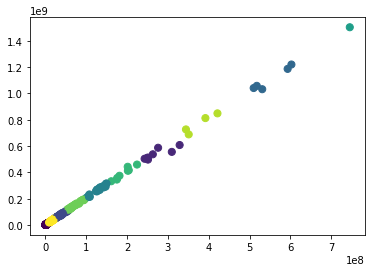

In [76]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y_kmeans, s=50, cmap='viridis')
#centers = kmeans.cluster_centers_
#plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='black', s=200, alpha=0.5)
plt

- #### Cluster the town councils given the ratio of income/expenses.

In [13]:
def get_total_town_council(data, code, row_type):
    return np.sum(data.loc[(data.CODI_ENS == code) & (data.TIPUS_PARTIDA == row_type), ["IMPORT"]].IMPORT)

def get_income_expenses_per_town_council(data):
    codes = np.unique(data.CODI_ENS)
    res = np.empty((codes.shape[0],2))
    
    i = 0;
    for code in codes:
        income = get_total_town_council(data, code, 'I')
        expense = get_total_town_council(data, code, 'D')
        res[i] = [code, income/expense]
        i = i +1
        
    return res

ratio_data = get_income_expenses_per_town_council(town_council_data)

In [23]:
transformed_data = pd.DataFrame(ratio_data[:, 1], columns=["RATIO"])


#dictionary = dict(zip(town_council_data["CODI_ENS"], town_council_data["NOM_COMPLERT"]))

#transformed_data.loc[transformed_data["CODI_ENS"] == dictionary["CODI_ENS"][245]]


#transformed_data["CODI_ENS"] = transformed_data["CODI_ENS"].map(dictionary)
transformed_data

,RATIO
0,0.475275
1,0.494919
2,0.473908
3,0.478843
4,0.468104
5,0.471914
6,0.478717
7,0.479890
8,0.472897
9,0.500081
